# Simulated random walk lightcurves
Demonstration that bootstrapping is a poor method for establishing the significance of a red-noise lightcurve

In [58]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as pl

from astroML.time_series import lomb_scargle, generate_damped_RW, lomb_scargle_bootstrap

## Simulate a red noise (damped random walk) lightcurve
Code taken from astroML example (http://www.astroml.org/book_figures/chapter10/fig_autocorrelation.html)

Left plot shows the DRW lightcurve, right plot shows a randomized (white noise) version

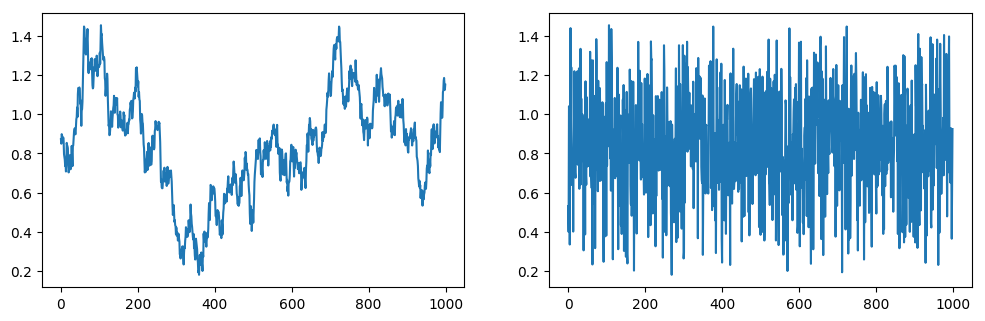

In [59]:
t = np.arange(0, 1E3)
z = 2.0
tau = 300
tau_obs = tau / (1. + z)

seed=np.random.seed()
y = generate_damped_RW(t, tau=tau, z=z, xmean=1, random_state=seed)

y_r=np.copy(y)
np.random.shuffle(y_r)

fig=pl.figure(figsize=(12,8))

ax1=pl.subplot(221)
pl.plot(t,y)

ax2=pl.subplot(222)
pl.plot(t,y_r)

pl.savefig('lightcurves.pdf',bbox_inches='tight')
pl.show()

The red and white noise have the same points, so the same mean and variance. However, they are qualitatively very different.

## Calculate Lomb-Scargle periodogram:
Calculating periodograms for both red and white noise lightcurves

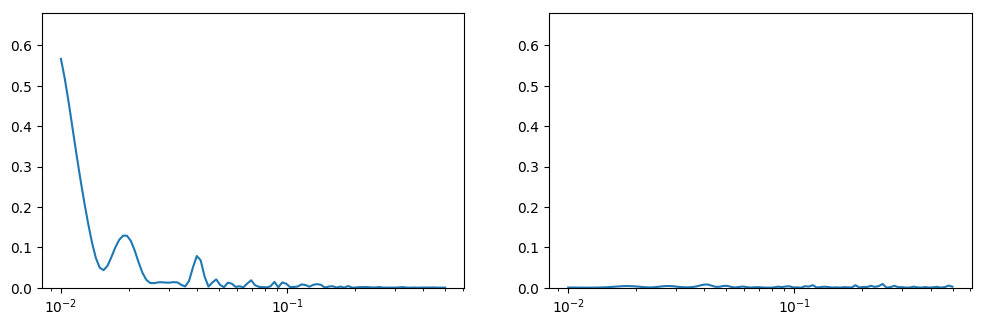

In [60]:

f=np.logspace(-2,np.log10(0.5),100)
ls=lomb_scargle(t,y,0.01,f)
ls_r=lomb_scargle(t,y_r,0.01,f)

fig=pl.figure(figsize=(12,8))

ax1=pl.subplot(221)
ax1.set_xscale('log')
ax1.set_ylim(0,1.2*max(ls))
pl.plot(f,ls)

ax2=pl.subplot(222)
ax2.set_xscale('log')
ax2.set_ylim(0,1.2*max(ls))
pl.plot(f,ls_r)

pl.show()

There are clearly strong peaks in the red noise periodogram that are not present in the white noise periodogram. 

## Calculate significance from bootstrap
Adapted from http://www.astroml.org/book_figures/chapter10/fig_LS_example.html

99.9% significance level: 0.0259630747051


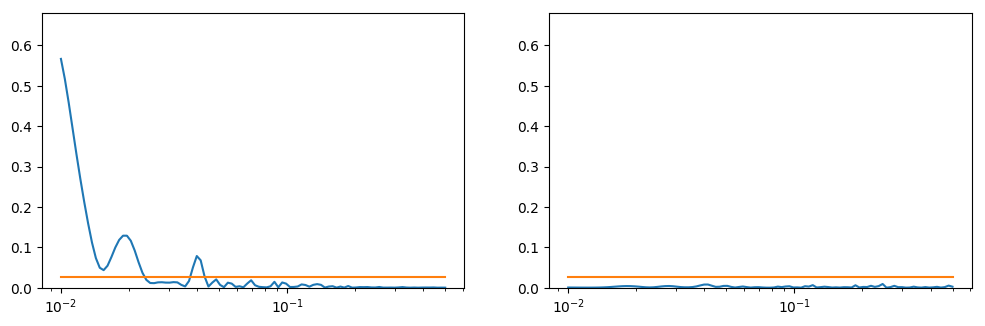

In [61]:
seed=np.random.seed()
D = lomb_scargle_bootstrap(t, y, 0.01, f, generalized=True,
                           N_bootstraps=1000, random_state=seed)
sig = np.percentile(D, 99.9)
print '99.9% significance level:', sig

fig=pl.figure(figsize=(12,8))

ax1=pl.subplot(221)
ax1.set_xscale('log')
ax1.set_ylim(0,1.2*max(ls))
pl.plot(f,ls)
pl.plot([f[0],f[-1]],[sig,sig])

ax2=pl.subplot(222)
ax2.set_xscale('log')
ax2.set_ylim(0,1.2*max(ls))
pl.plot(f,ls_r)
pl.plot([f[0],f[-1]],[sig,sig])

pl.savefig('periodograms.pdf',bbox_inches='tight')
pl.show()

In almost every run of this code, several features will be identified as exceeding the 99.9% limit in the red-noise periodogram and no features will be found in the white noise periodogram.

## Introduce sampling window:

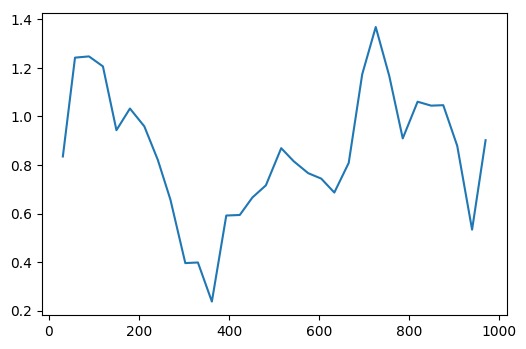

In [66]:

mean_spacing=30
gaps_range=2

diffs=np.random.randint(0,2*gaps_range,1000/mean_spacing+1)-gaps_range
samples=np.linspace(0,1000,1000/mean_spacing+1).astype('int')

# print samples
sampling=diffs+samples
sampling=sampling[sampling<1000]
sampling=sampling[sampling>0]

# print sampling
y_sampled=y[sampling]
# print y_sampled

pl.plot(sampling,y_sampled)

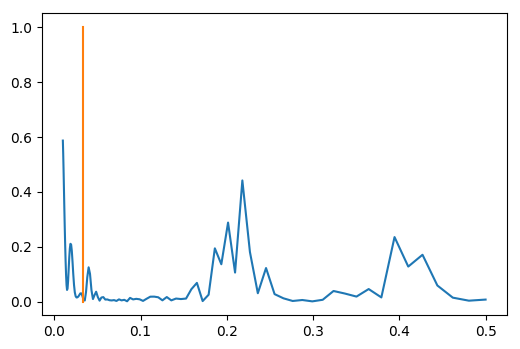

In [67]:

# f=np.logspace(-2,np.log10(0.5),100)
ls_sampled=lomb_scargle(sampling,y_sampled,0.01,f)

pl.plot(f,ls_sampled)
pl.plot([1./mean_spacing,1./mean_spacing],[0,1])